# ANN for make simulation and make prediction in physics

# import working liberary

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import RMSprop
from keras.models import load_model
import numpy as np

# global variables

In [12]:
# input variable to program
import os
# Get the name of the Excel file
#excel_files = [f for f in os.listdir('.') if f.endswith('.xlsx')]
excel_files = [f for f in os.listdir('.') if (f.endswith('.xlsx') and (not f.startswith('out')))]
inputFile = excel_files[0]   # 'All data mesons+baryons.xlsx'
inputSheetName = 'Sheet1' 
print("input file : ",inputFile)


input file :  collect data_ka-.xlsx


# read data

In [13]:
# Read the data from the excel file
data_all = pd.read_excel(inputFile,sheet_name=inputSheetName)
temp_data_all = data_all[data_all['spectrum']<60]
data =temp_data_all.reset_index(drop=True)

# Split the data into input and output variables
X = data[['mass','s','N part','Pt']]
y = data['spectrum'].to_frame('spectrum')

print(X.head)
print(y.head)

<bound method NDFrame.head of           mass     s  N part     Pt
0     0.493677   7.7     337  0.275
1     0.493677   7.7     337  0.325
2     0.493677   7.7     337  0.375
3     0.493677   7.7     337  0.425
4     0.493677   7.7     337  0.475
...        ...   ...     ...    ...
1077  0.493677  39.0      14  1.550
1078  0.493677  39.0      14  1.650
1079  0.493677  39.0      14  1.750
1080  0.493677  39.0      14  1.850
1081  0.493677  39.0      14  1.950

[1082 rows x 4 columns]>
<bound method NDFrame.head of       spectrum
0       5.4254
1       5.0241
2       4.6240
3       4.0719
4       3.4251
...        ...
1077    0.0037
1078    0.0025
1079    0.0016
1080    0.0010
1081    0.0008

[1082 rows x 1 columns]>


# normaliz input

In [14]:
# Normalize the input
from sklearn.preprocessing import RobustScaler
# Create a RobustScaler object
scaler = RobustScaler()
# Fit the scaler to the input data and transform it
X_normalized = scaler.fit_transform(X)
# Print the normalized input data
print('X_normalized')
print(X_normalized)
X_train = X_normalized
#X_train = X
print('X_train')
print(X_train) 


X_normalized
[[ 0.         -0.76774194  1.1957672  -0.62068966]
 [ 0.         -0.76774194  1.1957672  -0.55172414]
 [ 0.         -0.76774194  1.1957672  -0.48275862]
 ...
 [ 0.          1.2516129  -0.51322751  1.4137931 ]
 [ 0.          1.2516129  -0.51322751  1.55172414]
 [ 0.          1.2516129  -0.51322751  1.68965517]]
X_train
[[ 0.         -0.76774194  1.1957672  -0.62068966]
 [ 0.         -0.76774194  1.1957672  -0.55172414]
 [ 0.         -0.76774194  1.1957672  -0.48275862]
 ...
 [ 0.          1.2516129  -0.51322751  1.4137931 ]
 [ 0.          1.2516129  -0.51322751  1.55172414]
 [ 0.          1.2516129  -0.51322751  1.68965517]]


# loada saved model

In [15]:
# Load the saved model

# Rename the out model
""" modelName =str.split(inputFile,'.')[0]  + '.h5'
modelName = str.replace(modelName,' ','_')
modelName = str.replace(modelName,'+','_plus_')
modelName = str.replace(modelName,'-','_Negativ_')
print('modelName is : ',modelName) """

# load the saved model
modelNames = [f for f in os.listdir('.') if (f.endswith('.hf'))]
modelName = modelNames[0]
myepochs = int(100) 
mybatchSize = int(16)
model = load_model(modelName)
#configure output parameters
outputFile = 'out_- '+modelName+' .xlsx'
summaryOutFile = modelName + ' - Summary .txt'
outputSheetName = 'predicat_ '+modelName+' '
nameFigImg = 'fig_in4_ '+modelName+' .png'

# define the model - compile - fit - save

In [16]:

''' Define the model '''
# Define the model
model = Sequential(name=modelName)
# Add the first dense layer
model.add(Dense(40, input_dim=4, activation='relu'))

# Add batch normalization
#model.add(BatchNormalization())
model.add(Dense(40, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))

# Add the output layer
model.add(Dense(1))

''' # compile the model      '''
# Compile the model with Levenberg-Marquardt optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.001,)
model.compile(loss='mean_squared_error', optimizer=optimizer)

''' train the model & save current compiled model  '''
# Train the model
#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
model.fit(X_train, y, epochs=myepochs, batch_size=mybatchSize) 
# Save the model
model.save(modelName)




Epoch 1/100
68/68 [==============================] - 1s 2ms/step - loss: 3.6736
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 0.4492
Epoch 3/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2848
Epoch 4/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2653
Epoch 5/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2953
Epoch 6/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2659
Epoch 7/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2511
Epoch 8/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2053
Epoch 9/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1967
Epoch 10/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2003
Epoch 11/100
68/68 [==============================] - 0s 2ms/step - loss: 0.2083
Epoch 12/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1942
Epoch 13/100
68/68 [=================

d:\Repos\ReposEda\DrSamahPrjs\ANN\ANN\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluate the model and make prediction 

In [17]:
from sklearn.metrics import mean_squared_error

# Make predictions on new data
X_test =pd.DataFrame(X_train) #scaler.transform(X)
#X_test = scaler.fit_transform(X)
print("new_data is : ")
print(X_test)
predictions = model.predict(X_test)
predictions = predictions.flatten()
predictions = pd.Series(predictions)
predictions = predictions.to_frame('predictions')
print("predictions is : ")
print(predictions)

# Evaluate the model
score = model.evaluate(X_test, y)
print("score " , score)
print(score)
mse = mean_squared_error(y,predictions)
print('mse' , mse)


new_data is : 
        0         1         2         3
0     0.0 -0.767742  1.195767 -0.620690
1     0.0 -0.767742  1.195767 -0.551724
2     0.0 -0.767742  1.195767 -0.482759
3     0.0 -0.767742  1.195767 -0.413793
4     0.0 -0.767742  1.195767 -0.344828
...   ...       ...       ...       ...
1077  0.0  1.251613 -0.513228  1.137931
1078  0.0  1.251613 -0.513228  1.275862
1079  0.0  1.251613 -0.513228  1.413793
1080  0.0  1.251613 -0.513228  1.551724
1081  0.0  1.251613 -0.513228  1.689655

[1082 rows x 4 columns]
34/34 [==============================] - 0s 1ms/step
predictions is : 
      predictions
0        5.854382
1        5.036546
2        4.464616
3        3.811688
4        3.167145
...           ...
1077    -0.017774
1078    -0.026913
1079    -0.036199
1080    -0.045394
1081    -0.054913

[1082 rows x 1 columns]
34/34 [==============================] - 0s 1ms/step - loss: 0.0414
score  0.04140975698828697
0.04140975698828697
mse 0.041409759919569994


# draw 

shape of datap (1082, 8)
data : 
           mass     s  N part     Pt  spectrum     err1     err2
0     0.493677   7.7     337  0.275    5.4254  0.07627  0.35574
1     0.493677   7.7     337  0.325    5.0241  0.06260  0.31103
2     0.493677   7.7     337  0.375    4.6240  0.05297  0.27775
3     0.493677   7.7     337  0.425    4.0719  0.04485  0.24099
4     0.493677   7.7     337  0.475    3.4251  0.03772  0.20304
...        ...   ...     ...    ...       ...      ...      ...
1077  0.493677  39.0      14  1.550    0.0037  0.00007  0.00033
1078  0.493677  39.0      14  1.650    0.0025  0.00006  0.00022
1079  0.493677  39.0      14  1.750    0.0016  0.00004  0.00015
1080  0.493677  39.0      14  1.850    0.0010  0.00003  0.00010
1081  0.493677  39.0      14  1.950    0.0008  0.00003  0.00007

[1082 rows x 7 columns]
pred 
        predictions
0        5.854382
1        5.036546
2        4.464616
3        3.811688
4        3.167145
...           ...
1077    -0.017774
1078    -0.026913
107

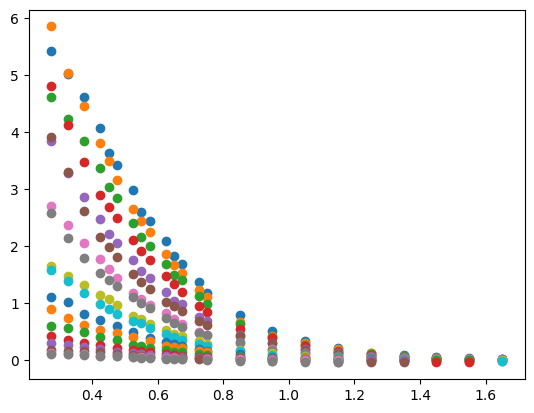

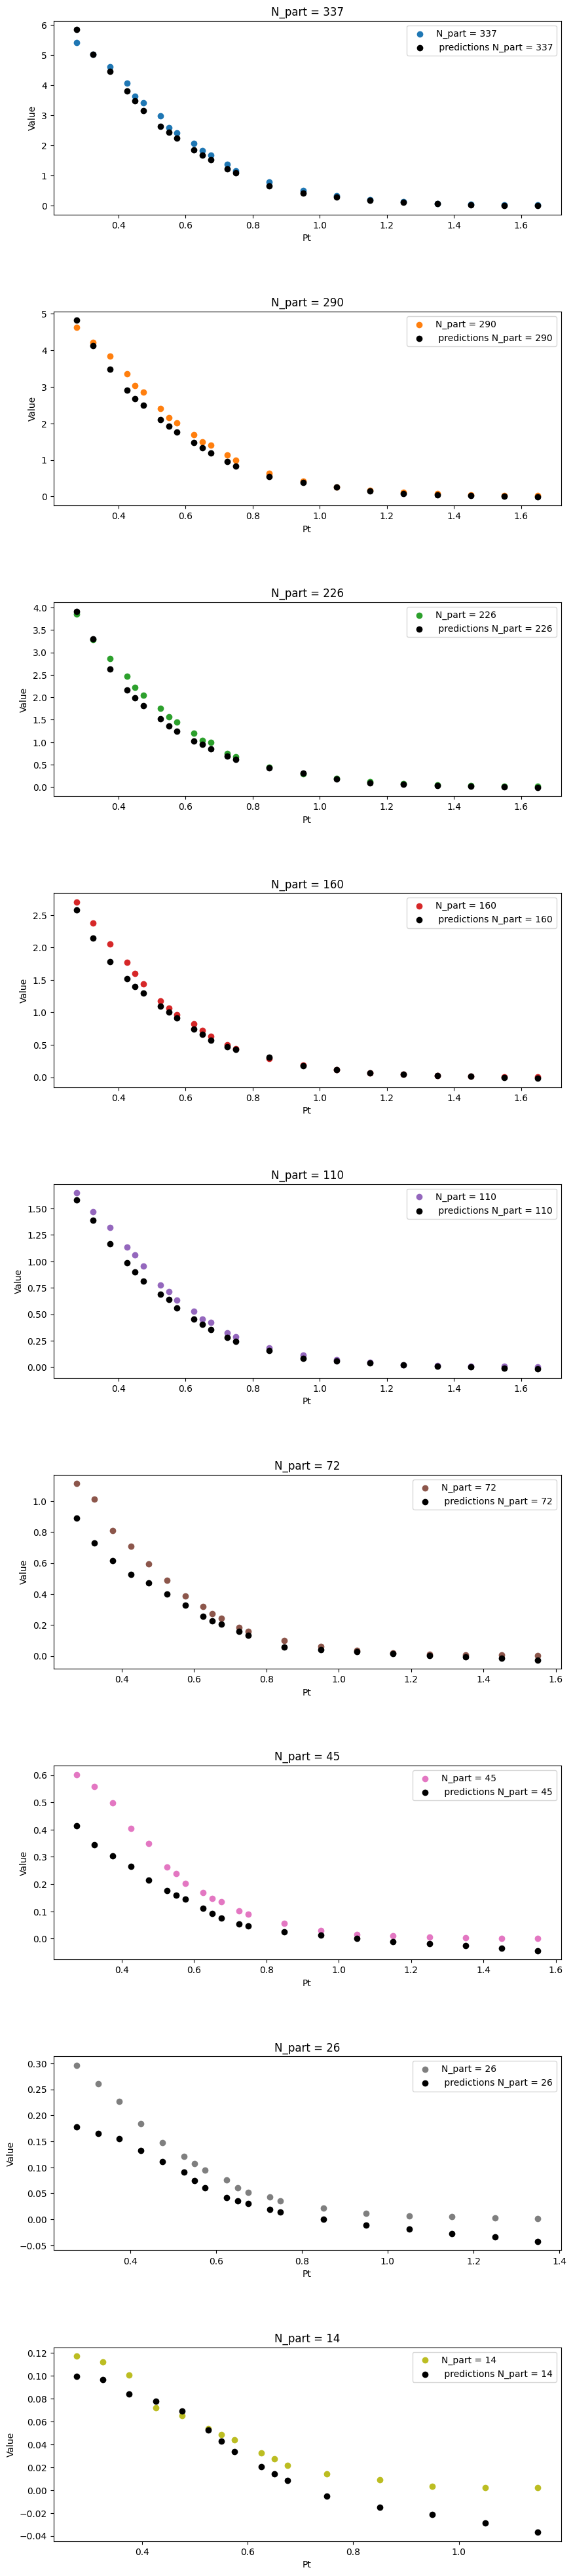

In [18]:
# for drawing in 2d i choose Pt as x-axis
error = data['spectrum'] - predictions['predictions']
error = error.to_frame('error')
#print('shape of data' , data.shape)
#print('shape of pred' , predictions.shape)
#datap = pd.concat([data,predictions],axis=1)
datap = pd.merge(data,predictions,left_index=True, right_index=True)
print('shape of datap',datap.shape)

print('data : \n',data)
print('pred \n ',predictions)
print('datap \n',datap)

# xap : data
xap = pd.DataFrame(datap)
# xapf : xap after filteration
xapf= pd.DataFrame(datap)
#xapf = xapf[xapf['mass']==0.13957] # only activate it in all mass at xlsx file
xapf = xapf[xapf['s']==7.7]
#xapf = xapf[xapf['N part']==337]

N_Part_Values  =xapf['N part'].unique() #xap['N part'].unique() # xapf['N part'].unique()
print('Npart values : \n')
for n in N_Part_Values:
    print('N is : ',n)
print('Npart values : \n',N_Part_Values)
dataGraph1 = pd.merge(xapf['Pt'],xapf['predictions'],left_index=True, right_index=True)
print('datagraph1 : \n',dataGraph1)
dataGraph = pd.merge(dataGraph1,xapf['spectrum'],left_index=True, right_index=True)
print('dataGraph : \n', dataGraph)
print('shape of dataGraph',dataGraph.shape)
# Plot the data and predictions
mergedData = pd.merge(dataGraph,xapf['N part'],left_index=True, right_index=True)
print('merged data is : \n',mergedData)
#plt.semilogy(xapf['Pt'], xapf['spectrum']   ,'bo', label='Actual')
#plt.semilogy(xapf['Pt'], xapf['predictions'],'ro', label='Predicted')
for n in N_Part_Values:
    plt.scatter(mergedData['Pt'][mergedData['N part']==n],mergedData['spectrum'][mergedData['N part']==n])
    plt.scatter(mergedData['Pt'][mergedData['N part']==n],mergedData['predictions'][mergedData['N part']==n])
    
    #print('n test :\n',mergedData['Pt'][mergedData['N part']==n])
plt.savefig("fig-all-"+nameFigImg)
##########
#import matplotlib.pyplot as plt
# Define the list ofValues and plot the data for each iteration
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=len(N_Part_Values), ncols=1, figsize=(10, 50))

#fig, axs = plt.subplots(N_Part_Values.size,1)
for i, n in enumerate(N_Part_Values):
    # Plot the 'Pt' column where N_part == n
    axs[i].scatter(mergedData['Pt'][mergedData['N part'] == n], 
                 mergedData['spectrum'][mergedData['N part'] == n], 
                 color='C{}'.format(i), 
                 label='N_part = {}'.format(n))

    # Plot the 'predictions' column where N_part == n
    axs[i].scatter(mergedData['Pt'][mergedData['N part'] == n], 
                 mergedData['predictions'][mergedData['N part'] == n], 
                 color='black', 
                  label=' predictions N_part = {}'.format(n))
                 #label='_nolegend_')

    # Add a legend and axis labels to the subplot
    axs[i].legend()
    axs[i].set_xlabel('Pt')
    axs[i].set_ylabel('Value')
    axs[i].set_title('N_part = {}'.format(n))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.savefig(nameFigImg)
plt.show()


# write output to excel 

In [19]:
# Write predictions , data to Excel file
err1=data['err1'].to_frame('err1')
err2=data['err2'].to_frame('err2')
#SquareErrorForEachPoint = np.sqrt( ((datap['predictions']- datap['Spectrum'])/(err1- err2)))
SquareErrorForEachPoint =np.square( (datap['predictions']- datap['spectrum'])/(err1['err1']+ err2['err2']))

SquareErrorForEachPoint = pd.Series(SquareErrorForEachPoint)
SquareErrorForEachPoint = SquareErrorForEachPoint.to_frame('SquareErrorForEachPoint')
print('Square error for each point : ',SquareErrorForEachPoint)

outputpredicat = pd.concat([datap, SquareErrorForEachPoint], axis=1)
mysum =outputpredicat['SquareErrorForEachPoint'].sum()
mycount =(outputpredicat['SquareErrorForEachPoint'].count()) -1
rmse = np.sqrt(mysum/mycount)

#rmse = np.sqrt (np.average(outputpredicat['SquareErrorForEachPoint']))
rmse = pd.Series(rmse)
#rmse = pd.DataFrame({'rmse': rmse})
print('RMSE',rmse)

# output is data frame
#print(outputpredicat.head(10))
# Write the DataFrames to an Excel file with three sheets
with pd.ExcelWriter(outputFile) as writer:
    outputpredicat.to_excel(writer, sheet_name=outputSheetName, index=False)
    rmse.to_excel(writer, sheet_name='RMSE', index=False)


Square error for each point :        SquareErrorForEachPoint
0                    0.986029
1                    0.001110
2                    0.232256
3                    0.828719
4                    1.147942
...                       ...
1077              2882.064931
1078             11034.875348
1079             39578.795423
1080            127363.815799
1081            310395.074076

[1082 rows x 1 columns]
RMSE 0    50.309237
dtype: float64


# print model summery 

In [20]:

print("End")
#print("accuracy :" + str(accuracy))
print("score " + str(score))
SummaryOut = model.summary()
print(SummaryOut)

from io import StringIO
# summarize the model
with StringIO() as buf:
    model.summary(print_fn=lambda x: buf.write(x + '\n'))
    summary = buf.getvalue()

with open(modelName +'-summary.txt', 'w') as f:
    f.write(summary)


print(summary)
print(modelName)
print('RMSE',rmse)



End
score 0.04140975698828697
Model: "collect_data_ka-.h5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 40)                200       
                                                                 
 dense_8 (Dense)             (None, 40)                1640      
                                                                 
 dense_9 (Dense)             (None, 80)                3280      
                                                                 
 dense_10 (Dense)            (None, 80)                6480      
                                                                 
 dense_11 (Dense)            (None, 40)                3240      
                                                                 
 dense_12 (Dense)            (None, 40)                1640      
                                                                 
 dense_13 (Dense)